<a href="https://colab.research.google.com/github/dduniverse/datacampus/blob/main/DA/JSON%EA%B3%BC_%EA%B3%B5%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## JSON

#### JSON(JavaScript Object Notation)
- JSON(JavaSvript Object Notation)은 경량의 DATA-교환 형식이다.
- 이 형식은 사람이 읽고 쓰기에 용이하며, 기계가 분석하고 생성함에도 용이하다.

#### 객체(object)
- JSON에서 데이터를 표현하는 최소 단위
- { } (중괄호)로 묶여진 여러 개의 name(이름)과 value(값)의 쌍(pair)
  - 이름은 항상 string(문자열)이어야 함
  - 이름/값의 쌍은 :(콜론)으로 분리
  - 여러 개의 쌍은 ,(쉼표)로 분리
- 순서(Order)는 고려하지 않음

#### 값(value)
- 값으로 사용할 수 있는 자료형
  - string(문자열)
  - number(숫자)
    - 정수(integer)
    - 실수(fraction)
    - 지수(exponent)
  - object(객체)
  - array(배열)
  - true/false
  - null

#### 문자열(string)
- " "(쌍 따옴표)로 묶여 있어야 함
- 문자열에 사용할 수 있는 기호
  - 따옴표, \(역 슬러시), 각종 제어문자를 제외한 표시 방법
  - 역 슬러시를 포함한
    - 따옴표
    - 역 슬러시
    - 슬러시
    - backspace
    - 폼피드
    - 라이피드
    - carriage return
    - horizontal tab
    - u를 포함한 4자리 16진수

#### 숫자(number)
- 음수/양수 모두 표기할 수 있음
- 정수는 0이 아닌 숫자로 시작하여, 0을 포함한 숫자로 끝남
- 실수는 정수에 소수점을 포함하여 숫자로 끝남
- 지수는 실수에 E 혹은 e를 포함하여 숫자로 끝남

#### 공백(whitespace)
- 문자열의 공백이 아닌, JSON이 내부적으로 표현할 때 사용하는 공백

#### Schema(스키마)
- 어떠한 구조
- 컴퓨터 공학에서 객체에 대한 자료형/구조 등을 의미,표현할 때 주로 사용
  - 데이터베이스 스키마: 데이터베이스에서 자료의 구조, 표현 방법 등을 정의한 구조
- 파이썬에서 하나의 변수가 다양한 자료형을 표현할 수 있듯이, JSON 또한 다양한 값을 표현할 수 있음

## 기상청 단기예보 조회서비스

\>>> 당일 날짜만 가능!!!!! <<<

#### 필요모듈 import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 모듈 requests 메소드 get

In [ ]:
import requests

#### URL 정보와 매개변수

In [ ]:
url='http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getUltraSrtNcst' # 요청주소

service_key='m9WQLzXhO4cNd5rhrm3XZgGm0i7my0MtUZb1DXGfo77OSmGUE9iuNmJMOVakM080eC4opIn1MU6shML3dQL0zQ==' # 본인 키

payload={'serviceKey':service_key, 'pageNo':'1',
         'numOfRows':'1000','dataType':'JSON',
         'base_date':'20220719','base_time':'0500',
         'nx':'60','ny':'127'} # 요청 변수

##### 정보 요청

In [ ]:
reqs=requests.get(url,params=payload)

In [ ]:
print(reqs.url) # 요청한 URL 주소(GET 방식이므로 확인 가능)
print(reqs.status_code) # 요청 결과, 정상 200

http://apis.data.go.kr/1360000/VilageFcstInfoService_2.0/getUltraSrtNcst?serviceKey=m9WQLzXhO4cNd5rhrm3XZgGm0i7my0MtUZb1DXGfo77OSmGUE9iuNmJMOVakM080eC4opIn1MU6shML3dQL0zQ%3D%3D&pageNo=1&numOfRows=1000&dataType=JSON&base_date=20220719&base_time=0500&nx=60&ny=127
200


##### 요청 결과

In [ ]:
print(reqs.text) # JSON 내용
print(len(reqs.content)) # JSON의 길이

{"response":{"header":{"resultCode":"00","resultMsg":"NORMAL_SERVICE"},"body":{"dataType":"JSON","items":{"item":[{"baseDate":"20220719","baseTime":"0500","category":"PTY","nx":60,"ny":127,"obsrValue":"0"},{"baseDate":"20220719","baseTime":"0500","category":"REH","nx":60,"ny":127,"obsrValue":"86"},{"baseDate":"20220719","baseTime":"0500","category":"RN1","nx":60,"ny":127,"obsrValue":"0"},{"baseDate":"20220719","baseTime":"0500","category":"T1H","nx":60,"ny":127,"obsrValue":"24.4"},{"baseDate":"20220719","baseTime":"0500","category":"UUU","nx":60,"ny":127,"obsrValue":"0.6"},{"baseDate":"20220719","baseTime":"0500","category":"VEC","nx":60,"ny":127,"obsrValue":"244"},{"baseDate":"20220719","baseTime":"0500","category":"VVV","nx":60,"ny":127,"obsrValue":"0.3"},{"baseDate":"20220719","baseTime":"0500","category":"WSD","nx":60,"ny":127,"obsrValue":"0.7"}]},"pageNo":1,"numOfRows":1000,"totalCount":8}}}
909


#### 모듈 JSON
- load/loads: 파일/문자열로부터 JSON 객체를 생성
- dump/dumps: 객체를 파일/문자열로 생성
- sort_keys: 메소드 dump/dumps로 불러온 JSON값인 딕셔너리 형태에서, Key 기준으로 정렬
- indent: JSON 값을 출력할 때, 들여쓰기 여부를 선택 

In [ ]:
import json
print(json.dumps(json.loads(reqs.text),sort_keys=True,indent=4))

{
    "response": {
        "body": {
            "dataType": "JSON",
            "items": {
                "item": [
                    {
                        "baseDate": "20220719",
                        "baseTime": "0500",
                        "category": "PTY",
                        "nx": 60,
                        "ny": 127,
                        "obsrValue": "0"
                    },
                    {
                        "baseDate": "20220719",
                        "baseTime": "0500",
                        "category": "REH",
                        "nx": 60,
                        "ny": 127,
                        "obsrValue": "86"
                    },
                    {
                        "baseDate": "20220719",
                        "baseTime": "0500",
                        "category": "RN1",
                        "nx": 60,
                        "ny": 127,
                        "obsrValue": "0"
                    },
          

#### JSON을 DataFrame으로

In [ ]:
load_json=json.loads(reqs.text) # reqs.text를 json객체로 만듦

print(type(load_json))
print(type(reqs.text))

<class 'dict'>
<class 'str'>


In [ ]:
df=pd.DataFrame(load_json)
df

,response
body,"{'dataType': 'JSON', 'items': {'item': [{'base..."
header,"{'resultCode': '00', 'resultMsg': 'NORMAL_SERV..."


#### JSON을 변환하여 Key 확인

In [ ]:
print(load_json.keys()) # key에는 response 밖에 없기 때문에, 위의 dataframe이 response에 있는 값이 body와 header로 생성됨

dict_keys(['response'])


In [ ]:
print(load_json['response']['body'].keys())

dict_keys(['dataType', 'items', 'pageNo', 'numOfRows', 'totalCount'])


In [ ]:
print(load_json['response']['body']['items'].keys())

dict_keys(['item'])


In [ ]:
print(load_json['response']['body']['items']['item']) # item안에는 더이상 key가 없음, 

[{'baseDate': '20220719', 'baseTime': '0500', 'category': 'PTY', 'nx': 60, 'ny': 127, 'obsrValue': '0'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'REH', 'nx': 60, 'ny': 127, 'obsrValue': '86'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'RN1', 'nx': 60, 'ny': 127, 'obsrValue': '0'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'T1H', 'nx': 60, 'ny': 127, 'obsrValue': '24.4'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'UUU', 'nx': 60, 'ny': 127, 'obsrValue': '0.6'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'VEC', 'nx': 60, 'ny': 127, 'obsrValue': '244'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'VVV', 'nx': 60, 'ny': 127, 'obsrValue': '0.3'}, {'baseDate': '20220719', 'baseTime': '0500', 'category': 'WSD', 'nx': 60, 'ny': 127, 'obsrValue': '0.7'}]


In [ ]:
print(load_json['response']['body']['items']['item'][0])

{'baseDate': '20220719', 'baseTime': '0500', 'category': 'PTY', 'nx': 60, 'ny': 127, 'obsrValue': '0'}


#### 다시 JSON을 DataFrame 으로

In [ ]:
df=pd.DataFrame(load_json['response']['body']['items']['item'])
df

,baseDate,baseTime,category,nx,ny,obsrValue
0,20220719,0500,PTY,60,127,0
1,20220719,0500,REH,60,127,86
2,20220719,0500,RN1,60,127,0
3,20220719,0500,T1H,60,127,24.4
4,20220719,0500,UUU,60,127,0.6
5,20220719,0500,VEC,60,127,244
6,20220719,0500,VVV,60,127,0.3
7,20220719,0500,WSD,60,127,0.7


#### 여러 시간의 단기 예보

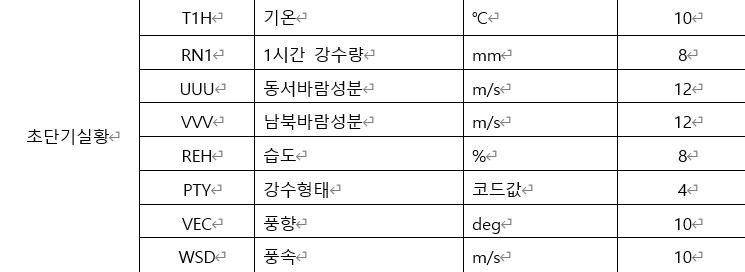

In [ ]:
import time

payload={'serviceKey':service_key, 'pageNo':'1',
         'numOfRows':'1000','dataType':'JSON',
         'base_date':'20220719','base_time':'0500',
         'nx':'60','ny':'127'} # 요청 변수
time_list=['0000','0200','0400','0600','0800','1000'] # 2시간 단위
pieces=list()

In [ ]:
for i in time_list:
  payload['base_time']=i
  reqs=requests.get(url,params=payload) # 요청
  time.sleep(1) # 요청할 때마다 1초 쉬기
  load_json=json.loads(reqs.text)
  df=pd.DataFrame(load_json['response']['body']['items']['item'])
  
  pieces.append(df) # 매 시간 조회한 날씨 정보의 JSON 응답 결과를 dataframe형태로 pieces에 저장

df_weather=pd.concat(pieces,ignore_index=True) # pieces에 저장된 서로 다른 DataFrame을 하나의 Dataframe으로 합침
df_weather

,baseDate,baseTime,category,nx,ny,obsrValue
0,20220719,0000,PTY,60,127,0
1,20220719,0000,REH,60,127,82
2,20220719,0000,RN1,60,127,0
3,20220719,0000,T1H,60,127,25.2
4,20220719,0000,UUU,60,127,-0.6
5,20220719,0000,VEC,60,127,55
6,20220719,0000,VVV,60,127,-0.4
7,20220719,0000,WSD,60,127,0.8
8,20220719,0200,PTY,60,127,0
9,20220719,0200,REH,60,127,83


## 기상청 지상(종관,ASOS) 일자료 조회서비스

#### URL 정보와 매개변수

In [ ]:
url='http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'

service_key='m9WQLzXhO4cNd5rhrm3XZgGm0i7my0MtUZb1DXGfo77OSmGUE9iuNmJMOVakM080eC4opIn1MU6shML3dQL0zQ=='

payload={'serviceKey':service_key,'numOfRows':'999',
         'pageNo':'1','dataType':'JSON',
         'dataCd':'ASOS','dateCd':'DAY',
         'startDt':'20220101','endDt':'20220701',
         'stnIds':'108'}

reqs=requests.get(url,params=payload)

load_json=json.loads(reqs.text)
print(load_json)

{'response': {'header': {'resultCode': '00', 'resultMsg': 'NORMAL_SERVICE'}, 'body': {'dataType': 'JSON', 'items': {'item': [{'stnId': '108', 'stnNm': '서울', 'tm': '2022-01-01', 'avgTa': '-4.3', 'minTa': '-10.2', 'minTaHrmt': '0710', 'maxTa': '2.3', 'maxTaHrmt': '1544', 'mi10MaxRn': '', 'mi10MaxRnHrmt': '', 'hr1MaxRn': '', 'hr1MaxRnHrmt': '', 'sumRnDur': '', 'sumRn': '', 'maxInsWs': '4.5', 'maxInsWsWd': '70', 'maxInsWsHrmt': '0923', 'maxWs': '2.8', 'maxWsWd': '20', 'maxWsHrmt': '0819', 'avgWs': '1.5', 'hr24SumRws': '1335', 'maxWd': '50', 'avgTd': '-14.4', 'minRhm': '31', 'minRhmHrmt': '1329', 'avgRhm': '46.3', 'avgPv': '2.1', 'avgPa': '1019.8', 'maxPs': '1034.0', 'maxPsHrmt': '0247', 'minPs': '1027.3', 'minPsHrmt': '2351', 'avgPs': '1030.9', 'ssDur': '9.6', 'sumSsHr': '9.0', 'hr1MaxIcsrHrmt': '1200', 'hr1MaxIcsr': '1.82', 'sumGsr': '10.39', 'ddMefs': '', 'ddMefsHrmt': '', 'ddMes': '', 'ddMesHrmt': '', 'sumDpthFhsc': '', 'avgTca': '1.4', 'avgLmac': '1.4', 'avgTs': '-3.7', 'minTg': '-15.4

#### JSON 응답 결과를 DataFrame 으로 변환

In [ ]:
df_weather_days=pd.DataFrame(load_json['response']['body']['items']['item'])
print(df_weather_days.shape)
df_weather_days # 데이터가 너무 많음

(182, 62)


,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,...,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,108,서울,2022-01-01,-4.3,-10.2,0710,2.3,1544,,,...,2.7,6.6,10.1,15.1,17.2,1.3,1.8,0.3,,
1,108,서울,2022-01-02,-1.3,-5.2,2356,3.0,1551,,,...,2.7,6.4,10.0,15.0,17.2,1.1,1.6,,{눈}0305-{눈}{강도0}0600-0715. {박무}0610-0705. {박무...,
2,108,서울,2022-01-03,-1.9,-8.0,0714,2.5,1542,,,...,2.5,6.2,9.8,14.9,17.2,1.1,1.6,0.0,{눈}1815-2055. {눈}2240-{눈}{강도0}2400-,
3,108,서울,2022-01-04,-2.5,-5.6,2400,1.0,1445,,,...,2.5,6.1,9.7,14.8,17.1,1.4,2.0,,-{눈}-0055.,
4,108,서울,2022-01-05,-2.8,-7.8,0634,1.9,1518,,,...,2.4,5.9,9.5,14.7,17.1,1.0,1.4,,{햇무리}0945-1535.,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,108,서울,2022-06-27,26.8,25.4,0454,28.1,1107,1.2,1331,...,24.2,21.8,20.7,15.6,13.9,2.0,2.9,6.1,{비}0025-{비}{강도0}0300-0435. {비}0620-0650. {비}07...,
178,108,서울,2022-06-28,26.9,25.7,2337,27.9,1001,3.1,1403,...,24.2,21.8,20.7,15.6,14.0,1.5,2.2,16.5,{비}0035-0050. {비}0115-0150. {비}0220-{비}{강도0}03...,
179,108,서울,2022-06-29,25.1,24.4,2134,26.1,1733,6.9,1212,...,24.1,21.9,20.7,15.7,14.0,0.7,1.0,114.7,-{비}-{비}{강도0}0300-{비}{강도0}0600-0750. {비}0850-{...,
180,108,서울,2022-06-30,22.3,21.2,1739,24.5,0001,10.9,1019,...,24.3,22.6,21.8,16.6,14.0,0.8,1.1,87.9,-{비}-{비}{강도0}0300-{시정(미만)}{1km}{비}0315-{시정(이상)...,


#### 관측 날짜와 평균 온도만 슬라이싱

In [ ]:
df_avgTa=pd.DataFrame(df_weather_days[['tm','avgTa']],copy=True)
df_avgTa

,tm,avgTa
0,2022-01-01,-4.3
1,2022-01-02,-1.3
2,2022-01-03,-1.9
3,2022-01-04,-2.5
4,2022-01-05,-2.8
...,...,...
177,2022-06-27,26.8
178,2022-06-28,26.9
179,2022-06-29,25.1
180,2022-06-30,22.3


#### 날짜 정보인 열 tm을 index 정보로 변경

In [ ]:
df_avgTa.set_index('tm',inplace=True) # im을 index로 사용
df_avgTa

,avgTa
tm,
2022-01-01,-4.3
2022-01-02,-1.3
2022-01-03,-1.9
2022-01-04,-2.5
2022-01-05,-2.8
...,...
2022-06-27,26.8
2022-06-28,26.9
2022-06-29,25.1


#### 평균 온도 열의 자료형 변환

In [ ]:
df_avgTa['avgTa'].dtype # avgTa 자료형: object -> 문자열 취급

dtype('O')

- 그래프로 그릴 때 문자형은 불편하므로, 자료형을 실수형으로 변환
- 변환 전, 결측치가 있는지 확인

In [ ]:
df_avgTa['avgTa'].isna().sum() # sum을 했을 때 0이 나와야 결측치가 없는 것.

0

In [ ]:
df_avgTa['avgTa']=df_avgTa['avgTa'].astype('float64') # float64로 데이터 형 변환.
df_avgTa

,avgTa
tm,
2022-01-01,-4.3
2022-01-02,-1.3
2022-01-03,-1.9
2022-01-04,-2.5
2022-01-05,-2.8
...,...
2022-06-27,26.8
2022-06-28,26.9
2022-06-29,25.1


- avgTa의 최솟값/최댓값 확인

In [ ]:
df_avgTa['avgTa'].min()

-7.7

In [ ]:
df_avgTa['avgTa'].max()

26.9

#### 그래프로 변환
- x축은 index 정보인 날짜로, 0 부터 999 까지의 30 개 단위로 출력
- y축은 평균 온도로, 앞서 계산한 최댓값 최솟값을 참고하여 적절한 값을 설정하고 5개 단위로 출력

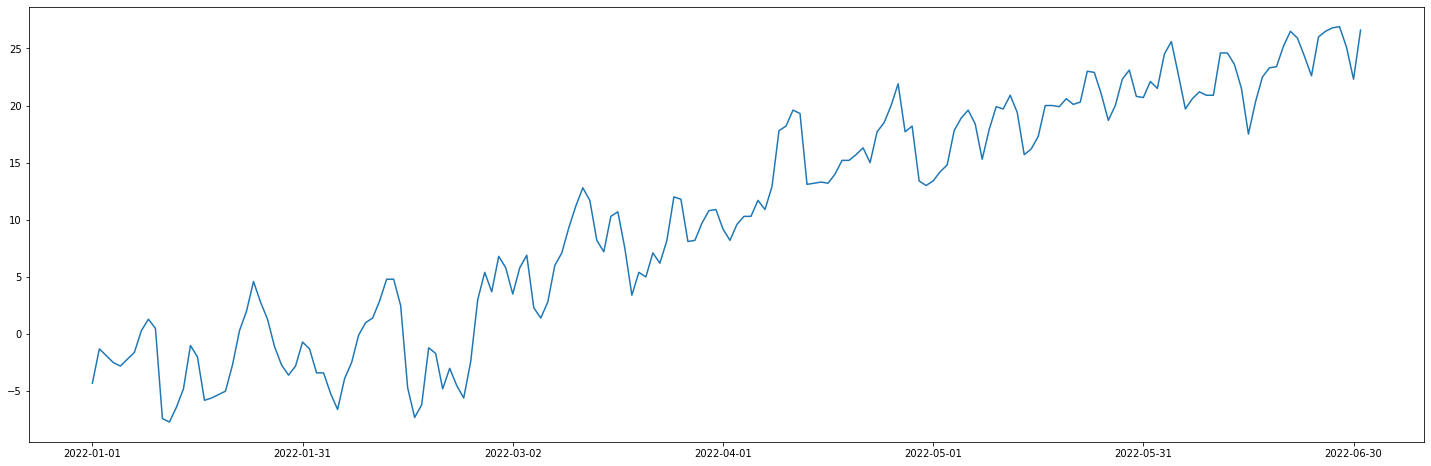

In [ ]:
fig,ax=plt.subplots(figsize=(25,8))

ax.set_xticks(np.arange(0,999,30)) 
ax.set_yticks(range(-20,40,5))
ax.plot(df_avgTa)

plt.show()

#### +) 2020년 1월 1일부터 2022년 7월 1일까지

In [ ]:
url='http://apis.data.go.kr/1360000/AsosDalyInfoService/getWthrDataList'

service_key='m9WQLzXhO4cNd5rhrm3XZgGm0i7my0MtUZb1DXGfo77OSmGUE9iuNmJMOVakM080eC4opIn1MU6shML3dQL0zQ=='

payload={'serviceKey':service_key,'numOfRows':'999',
         'pageNo':'1','dataType':'JSON',
         'dataCd':'ASOS','dateCd':'DAY',
         'startDt':'20200101','endDt':'20220701',
         'stnIds':'108'}

reqs=requests.get(url,params=payload)

load_json=json.loads(reqs.text)
print(len(reqs.content))

1016209


In [ ]:
df_weather_days=pd.DataFrame(load_json['response']['body']['items']['item'])
df_weather_days.shape

(913, 62)

In [ ]:
df_avgTa=pd.DataFrame(df_weather_days[['tm','avgTa']],copy=True)
df_avgTa

,tm,avgTa
0,2020-01-01,-2.2
1,2020-01-02,1.0
2,2020-01-03,-0.1
3,2020-01-04,1.2
4,2020-01-05,1.3
...,...,...
908,2022-06-27,26.8
909,2022-06-28,26.9
910,2022-06-29,25.1
911,2022-06-30,22.3


In [ ]:
df_avgTa.set_index('tm',inplace=True) # im을 index로 사용
df_avgTa

,avgTa
tm,
2020-01-01,-2.2
2020-01-02,1.0
2020-01-03,-0.1
2020-01-04,1.2
2020-01-05,1.3
...,...
2022-06-27,26.8
2022-06-28,26.9
2022-06-29,25.1


In [ ]:
df_avgTa['avgTa'].dtype # avgTa 자료형: object -> 문자열 취급

dtype('O')

In [ ]:
df_avgTa['avgTa']=df_avgTa['avgTa'].astype('float64') # float64로 데이터 형 변환.
df_avgTa

,avgTa
tm,
2020-01-01,-2.2
2020-01-02,1.0
2020-01-03,-0.1
2020-01-04,1.2
2020-01-05,1.3
...,...
2022-06-27,26.8
2022-06-28,26.9
2022-06-29,25.1


In [ ]:
df_avgTa['avgTa'].min()

-14.9

In [ ]:
df_avgTa['avgTa'].max()

31.7

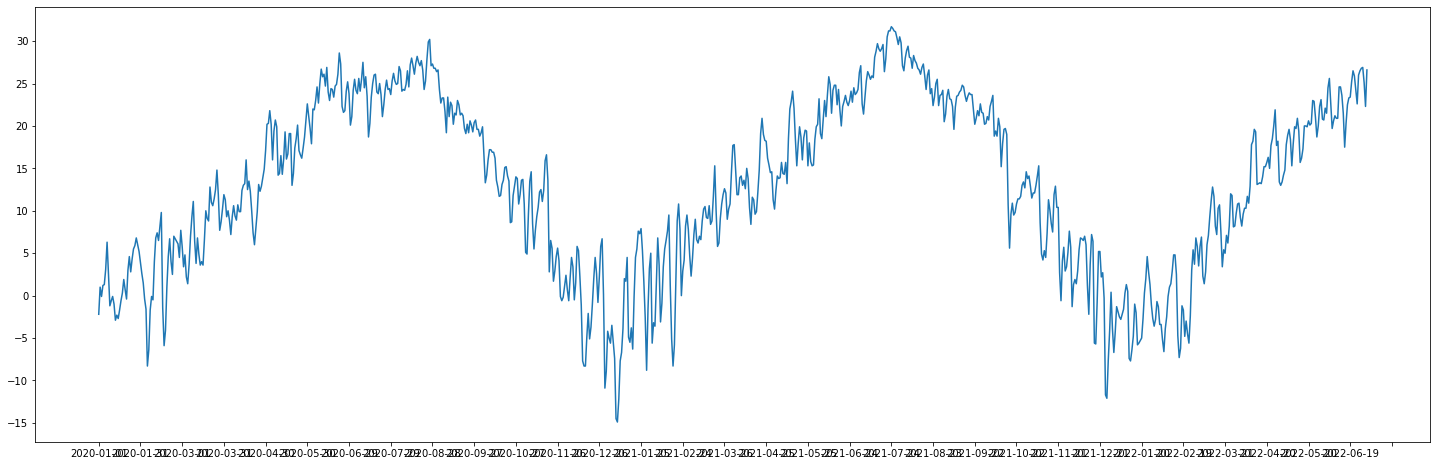

In [ ]:
fig,ax=plt.subplots(figsize=(25,8))

ax.set_xticks(np.arange(0,999,30)) 
ax.set_yticks(range(-20,40,5))
ax.plot(df_avgTa)

plt.show()

## 이동 평균

#### 데이터 변환 방법
- 평활화
- 집계
- 일반화
- 정규화
- 범주화

#### 평활화
- 데이터로부터 발생할 수 있는 잡음을 제거하기 위해, 추세에 맞지 않은 이상값들을 제거
- 이동 평균은 평활화의 한 기법

#### 시계열 데이터는 다음과 같은 특성이 있다고 가정
- 추세(Trend): 데이터가 장기적으로 증가하거나 감소
- 계절(Seasonality): 데이터가 특정 주기로 증가하거나 감소
- 주기(Cycle): 계절성보다 더 긴 주기로 증가하거나 감소

#### 메소드 rolling
- 변동이 잦은 데이터에서 추세/계절/주기를 갖는 기초적인 방법
- 동일한 크기의 window를 열 기준으로 연속적으로 슬라이싱
- 슬라이싱한 데이터는 평균으로 계산하여, 새로운 Dataframe을 생성

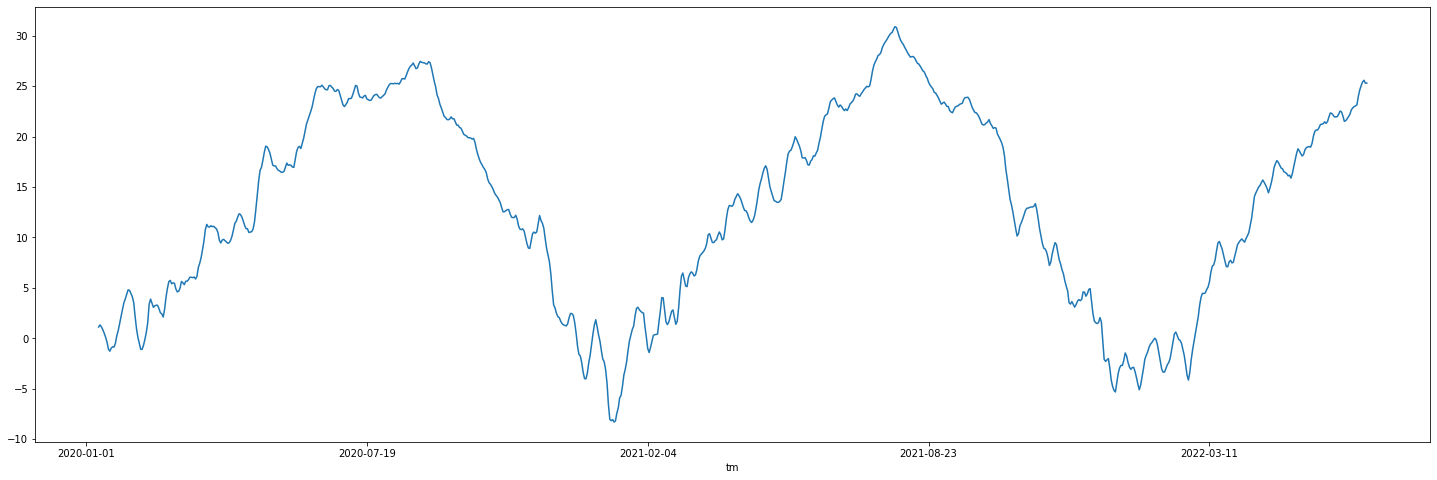

In [ ]:
fig,ax=plt.subplots(figsize=(25,8))

df_avgTa['avgTa'].rolling(10).mean().plot(ax=ax) # window=10, 10개의 데이터를 평균화 시켜서 계산
plt.show()